## EAS 503 Homework 2 Submission
Name - _Enter your name here_

**Make sure that you rename the notebook file to *replacewithubitname*_eas503_hw2.ipynb**


### Submission Details 
* **Due Date** - October 17, 2017 by 11.59 PM PST. All assignments have to be submitted using UBLearns.
* **Number of Problems** - 4 
* **Maximum points** - 50
* **Collaboration policy**
 - Every student has to submit individual homeworks
 - Any collaboration, in the form of discussion, with other members of the class is permitted, as long as the names of the collaborating members are explicitly stated on top of the submitted homework.
 - Any overlap with another submission or material from Internet will be awarded an F.
* **Late submission policy** - _No late submissions allowed_
* **Submission Format** - Enter code for each problem in the appropriate cell below. You may use multiple cells for a single problem to improve readability.

### Problem 1 - Inheritance and Encapsulation (10 points)

Consider a class of credit card accounts. A credit card account can have 2 types of credit cards:
1. Primary card  
2. Supplement card (Sup-card)

A primary account is the main account to which multiple sup-cards are linked. The primary credit card holder will be responsible for the bill payments for all the transactions on the primary card itself as well as all its supplimentary cards. Assume that each sup-card has the same individual credit limit as the primary credit card. Any transaction over the permitted account credit limit must be denied i.e. if the total account balance exceeds the credit limit on the primary account, any transaction, on all the cards linked to the account (primary or sup-card), will be denied.

For this problem, design a class `PrimaryCard` with all the account details and primary credit card details included in the class. Construct a sub-class of supplementary card holder, `SupplementaryCard`, linked to a primary credit card account. Ensure that the sensitive details of all the accounts (credit card numbers, balance, account limit etc.) must saved and accessed securely. 

Use the `Account_details.txt` file to access the account details for 15 credit cards. The transaction details for the month of october are provided in `transaction.txt` file. Design an algorithm to update the account balance on all the accounts and plot the final account balance on each day for the month of october.

In [18]:
#Enter your solution here
#Enter your solution here
class Primary:
    def __init__(self,CID,CardNo,AcNo,Lim,Bal):
        self.CID=CID
        self.CardNo=CardNo
        self.AcNo=AcNo
        self.Lim=Lim
        self.Bal=Bal
        self.amnt=amnt
    def add_trans(self):
        self.Bal=self.Bal+self.amnt
        return self.Bal
    def refuse_trans(self):
        self.Bal=self.Bal-self.amnt
        print("Amount exceeded")
        return self.Bal
    def limit(self):
        if self.Bal>self.Lim:
            self.refuse_trans()
        else:
            return self.Bal

class Sup(Primary):
    def __init__(self,CID,CardNo,AcNo,Lim,Bal):
        super().__init__(CID,CardNo,AcNo,Lim,Bal)
    
        


In [23]:
cid=[]
cn=[]
an=[]
clim=[]
cbal=[]
with open('Account_Details.txt','r') as acnt:
    for i in acnt:
        A=i.split('\t')
        customerID=A[0]
        cid.append(customerID)
        cardNo=A[1]
        cn.append(cardNo)
        acntNo=A[2]
        an.append(acntNo)
        cardLim=A[4]
        clim.append(cardLim)
        curBal=A[5]
        cbal.append(curBal)
        
       # if A[3]=='P':
         #   m1=Primary(A[0],A[1],A[2],A[4],A[5])
        #elif A[3]=='S':
          #  m2=sup(A[0],A[1],A[2],A[4],A[5])

for i in range(0,len(an)):
    for j in range(0,len(an)):
        if an[i]==an[j]:
            an.remove(an[j])
            cbal[i]=cbal[i]+cbal[j]
            cbal.remove(cbal[j])
            cn.remove(cn[j])
print(an)
            
with open('Transaction.txt','r') as acnt:
    for i in acnt:
        T=i.split('\t')
        customerID=T[0]
        amnt=T[1]
        date=T[2]


IndexError: list index out of range

### Problem 2 - Polynomials (15 Points)

Consider a general form of an nth order polynomial. You are asked to implement a polynomial of arbitrary degree using classes in python. For instance consider the polynomial:
$$4x^3 + 3x^2 + 7 = 0$$

For this implements the following steps:
1. Implement a class that represents a single term. 
2. Implement a class for the entire polynomial. 
3. Implement an operator ($*$) to multiply two single terms, a term and a polynomial, and two polynomials. (__Note__: _you can overload the $*$ operator in Python by defining a method called ``__mul__(self,other):`` and make it mutiply the ``self`` object with the ``other`` object)
4. Implement an operator(s) that enables addition of a term and a polynomial and/or two polynomials. (__Note__: _you can overload the  $+$  operator in Python by defining a method called ``__add__(self,other)``: and make it add the self object with the other object)
5. Implement the following two internal methods within ``Polynomial`` class:
    - ``order()``, which returns the order of the polynomial (as an ``int``).
    - ``solve()``, which returns solutions for the polynomial (a ``list`` of roots). Only do it for quadratic polynomials, and raise an exception for higher order polynomials.
6. Implement an external function that plots the polynomial on a domain of [-10,10] (you will have to use _matplotlib_ rountines for this).
7. Include a destructor function for the polynomial class.

Use the above class definitions and operators to generate the solutions (wherever needed) for the following set of polynomials:

1. $x^2 -7x +3=0$
2. $x^3 -8x +5=0$
3. Consider the following three polynomials: $f(x)=x,$ $g(x)=x^2$ and $p(x)=9x^2 +2$. Plot the function $f(x)-g(x)*p(x)=0$ by taking $f,g,p$ as input functions. For this, use the ``__mul__(self,other)`` and ``__add__(self,other)`` methods.

Note: Here you are basically asked to define the basis for the vector space of real polynomials and define all the vector operations.

In [17]:
import re,string,math
from sympy import Symbol, Poly
class Represent:
	def __init__(self,p):
		self.p=p
		a=str.replace(self.p,"-", "+-")
		s=re.split(r'[+]', a)
		print(s)
		
class Polynomial:
	def __init__(self,p):
		self.p=p
	def getCoef(self):
		
		x = Symbol('x')
		self.co=Poly(self.p, x).all_coeffs()
		cof = self.co[::-1]
		return cof
	def order(self):
		o=self.getCoef()
		return (len(o)-1)
	def solve(self):
		l=self.getCoef()
		
		if self.order()==2:
			a=float(l[2])
			b=float(l[1])
			c=float(l[0])
			d=b**2-4*a*c
			sol1 = (-b-(d**(0.5)))/(2*a)
			sol2 = (-b+(d**(0.5)))/(2*a)
			sol=[sol1,sol2]
			#print("Solution of the equation",sol)
			return sol
		else:
			return "Entered equation is not quadratic"
		
	def __add__(self,other):
		c1=self.getCoef()
		c2=other.getCoef()
		k=(max(self.order(),other.order()))
		addlist=[0]*(k+1)
		dif=abs(self.order()-other.order())
		for j in range(0,dif+1):
			if len(c1)>len(c2):
				c2.append(0)
			elif len(c2)>len(c1):
				c1.append(0)
		for i in range(0,k+1):
			addlist[i]=c1[i]+c2[i]
		if len(addlist)==1:
    			return addlist[0]
		elif len(addlist)>1:
			addition=[str(addlist[0])]
			for i in range(1,len(addlist)):
				x=str(addlist[i])+'*x**'+str(i)
				addition.append(str(x))
			addition1=addition[::-1]
			s='+'.join((addition1))
			a=str.replace(s,"+-", "-")
			return a
				    
	def __mul__(self,other):
		c1=self.getCoef()
		c2=other.getCoef()
		k1=self.order()
		k2=other.order()
		m=k1+k2+1
		mullist=[0]*(m)
		#print(mullist)
		for i in range(0,k1+1):
			for j in range(0,k2+1):
				l=i+j
				mullist[l]=c1[i]*c2[j]+mullist[l]
		if len(mullist)==1:
    			return mullist[0]
		elif len(mullist)>1:
			addition=[str(mullist[0])]
			for i in range(1,len(mullist)):
				x=str(mullist[i])+'*x**'+str(i)
				addition.append(str(x))
			addition1=addition[::-1]
			s='+'.join((addition1))
			a=str.replace(s,"+-", "-")
			return a

	def __sub__(self,other):
		
		c1=self.getCoef()
		c2=other.getCoef()
		k=(max(self.order(),other.order()))
		addlist=[0]*(k+1)
		dif=abs(self.order()-other.order())
		for j in range(0,dif+1):
			if len(c1)>len(c2):
				c2.append(0)
			elif len(c2)>len(c1):
				c1.append(0)
		for i in range(0,k+1):
			addlist[i]=c1[i]-c2[i]
		if len(addlist)==1:
    			return addlist[0]
		elif len(addlist)>1:
			addition=[str(addlist[0])]
			for i in range(1,len(addlist)):
				x=str(addlist[i])+'*x**'+str(i)
				addition.append(str(x))
			addition1=addition[::-1]
			s='+'.join((addition1))
			a=str.replace(s,"+-", "-")
			return a
		    
	def __del__(self):
		pass


term1=input("\nEnter a polynomial in the string format(a*x**2+b*x+c) on which you want to perform the operations")
t=Represent(term1)
Survey=input("\nAre you going to perform mathematical operations of multiple polynomials?(Y/N)")
if Survey=='Y' or Survey=='y':
	term2=input("\nEnter a polynomial in the string format(a*x**2+b*x+c)")
	term3=input("Enter a polynomial in the string format(a*x**2+b*x+c)")
	
	t1=Polynomial(term1)
	t2=Polynomial(term2)
	t3=Polynomial(term3)

	t4=t1+t2
	t5=t1*t2
	t6=t1-t2
	print('Result of addition is: ',t4)
	print('Result of multiplication is: ',t5)
	print('Result of subtraction is: ',t6)
	
	#t1=Polynomial(term1)
	print("\n**Coefficients**\n")
	z1=t1.getCoef()
	print("Coef of",term1," are:",z1)
	print("\n**Orders**\n")
	order1=t1.order()
	print("order of",term1,"is",order1)

	print("Solution for ",term1,"is",t1.solve())
	print("Solution for ",term2,"is",t2.solve())
else:
	t1=Polynomial(term1)
	print("\n**Coefficients**\n")
	z1=t1.getCoef()
	print("Coef of",term1," are:",z1)
	print("\n**Orders**\n")
	order1=t1.order()
	print("order of",term1,"is",order1)
	print("\n**Solutions for,",term1,"**\n")
	sol=t1.solve()
	print(sol)


Enter a polynomial in the string format(a*x**2+b*x+c) on which you want to perform the operationsx**3-8*x+5
['x**3', '-8*x', '5']

Are you going to perform mathematical operations of multiple polynomials?(Y/N)y

Enter a polynomial in the string format(a*x**2+b*x+c)x**2-7*x+3
Enter a polynomial in the string format(a*x**2+b*x+c)1
Result of addition is:  1*x**3+1*x**2-15*x**1+8
Result of multiplication is:  1*x**5-7*x**4-5*x**3+61*x**2-59*x**1+15
Result of subtraction is:  1*x**3-1*x**2-1*x**1+2

**Coefficients**

Coef of x**3-8*x+5  are: [5, -8, 0, 1]

**Orders**

order of x**3-8*x+5 is 3
Solution for  x**3-8*x+5 is Entered equation is not quadratic
Solution for  x**2-7*x+3 is [0.45861873485089033, 6.541381265149109]


### Problem 3 - Random Walk (15 Points)

Imagine you are standing at (0,0) on the real plane. At every time step, assume you either take a unit step in one of the four directions (right, left, up, down) with equal probability. This means that after one time step, your new location can be (1,0), (-1,0), (0,1) or (0,-1) with equal probability.

For this, create a class `Walker`. The class needs to store the following information:
- current position of the walker, where the position is a 2-tuple. You can initialize it to (0,0)
- path taken so far by the walker (initially this list will only contain the current position)
- method called ``getDirection()`` that determines the direction for the next step (one out of four possible directions: right, left, up, down). To determine the direction, sample a random value from the set {1,2,3,4} using `np.random.randint(0,N)` and assign each outcome to a unit step movement in a particular direction.
- method called ``walk()`` which changes the current position of the walker in a specifed direction. Make sure to update the path field to incorporate the next position.

After implementing the `Walker` class, you need to conduct the following experiment.
Suppose you want to figure out, how many steps will it take for the walker to go outside a pre-defined perimeter (centered at (0,0)). You will have simulate a random walk and keep checking the current position to figure that out. 

Write a code to run the following simulation:
Starting from (0,0), have your walker randomly walk around (using the defined ``walk()`` method), until it steps out of a rectangular area with vertices as: (-4,-4), (-4,4), (4,4), (4,-4). Count the number of steps taken before the walker leaves the area. Repeat the simulation 5 times and report the average number of steps taken by the walker before it exits the area.

Plot the path taken in each of the 5 simulation runs (you should all five walks in one graph using different colors).


**For 0 th simulation**
final Position (1, -5)
No of iterations 32

**For 1 th simulation**
final Position (5, -1)
No of iterations 72

**For 2 th simulation**
final Position (-1, -5)
No of iterations 44

**For 3 th simulation**
final Position (5, 0)
No of iterations 14

**For 4 th simulation**
final Position (-5, -1)
No of iterations 60

Mean is: 44.4


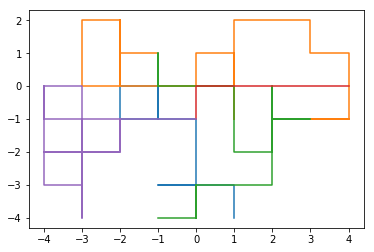

In [11]:
import random as random
import matplotlib.pyplot as plt
%matplotlib inline 
class Walker:
	def __init__(self,x,y):
		self.x=x
		self.y=y
		pos=(x,y)
		self.path=[pos]
	
	def getDir(self,x,y):
		w=random.randint(1,4)
		if w==1:
			x=x+1 
		elif w==2:
			x=x-1 
		elif w==3:
			y=y-1
		elif w==4:
			y=y+1
		pos=(x,y)
		return pos
			
	def walk(self,pos):
		self.path.append(pos)
		#print(self.path)
		return self.path
    
iteration=[]
for i in range(0,5):
    myobj=Walker(0,0)
    x=[]
    y=[]
    a=myobj.getDir(0,0)
    print("\n**For",i,"th simulation**")

    while -4<=a[0]<=4 and -4<=a[1]<=4:
        myobj.walk(a)
        x.append(a[0])
        y.append(a[1])
        a=myobj.getDir(a[0],a[1])
        b=myobj.walk(a)
    plt.plot(x,y)
    #plt.show() #to show different graphs for different simulations
    print("final Position",a)
    itr=len(b)+1
    iteration.append(itr)
    print("No of iterations",itr)
s=sum(list(iteration))
mean=s/(len(iteration))
print('\nMean is:',mean)

### Problem 4 - Inverse Transform Sampling (10 Points)

Random sample for any distribution can be generated from a random sample from uniform distribution. This can be done using **Inverse transform Sampling**. For example, suppose you want to create a sample of size $n$ from an _exponential distribution_. To obtain this sample:
1. Generate a sample of size $n$ from Uniform[0,1].
2. Identify the inverse of the CDF function of the distribution of your choice (this needs to be done manually and implemented). In our example, it is exponential distribution. Call this function ``inverseCDFExponential()``. Note that you are not allowed to use any routines from ``np.random`` package here. This function should take two arguments, first is the sample point, and the second is the distribution parameter value, $\lambda$.
3. Apply the ``inverseCDFExponential()`` function on each of the $n$ sample points that you generated in step 1. The $n$ outputs will be the sample from your desired distribution. 

Using the above implementation, generate a sample of size 100 from an  Exponential ($\lambda=4$) distribution.

Your output must include the mean, variance and distribution plot (a histogram) for the generated sample. 

Mean: 0.2696533547732374
Variance: 0.0830894238342


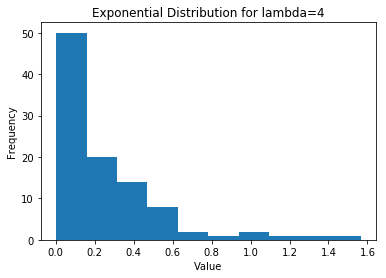

In [4]:
#Enter your solution here
import numpy as np
import math
import matplotlib.pyplot as plt
%matplotlib inline 
def main():
    InverseCDF()
def InverseCDF():
    s=(np.random.uniform(low=0.0, high=1.0, size=100)).tolist()
    dist=[]
    for i in range(0,100):
        x=(math.log(1-s[i]))/-4
        dist.append(x)    
    s=sum(list(dist))
    mean=s/len(dist)
    print('Mean:',mean)
    print('Variance:',np.var(dist))
    plt.hist(dist)
    plt.title("Exponential Distribution for lambda=4")
    plt.xlabel("Value")
    plt.ylabel("Frequency")
main()